# Procesamiento de imágenes de mangos con extracción de características Hu Moments y modelado de regresión lineal para estimación de peso

In [ ]:
# Importar librerías
import cv2
import os
import random
import joblib
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
%cd /content/drive/MyDrive/Computer_Vision//MangoMass/MangoMass

/content/drive/MyDrive/Computer_Vision/MangoMass/MangoMass


In [ ]:
# Montar Google Drive para acceder a las imágenes
drive.mount('/content/drive')

# Ruta al directorio que contiene las imágenes
images_dir = 'images'

# Crear un directorio para almacenar las imágenes procesadas
output_dir = 'images_binarizadas'
os.makedirs(output_dir, exist_ok=True)

# Iterar sobre todas las imágenes en el directorio
for filename in os.listdir(images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Cargar la imagen
        image_path = os.path.join(images_dir, filename)
        img = cv2.imread(image_path)

        # Convertir a escala de grises
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Aplicar filtro de mediana para reducir el ruido
        blurred = cv2.medianBlur(gray, 5)

        # Aplicar umbralización adaptativa
        thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

        # Encontrar contornos en la imagen umbralizada
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Crear una imagen de fondo blanco del mismo tamaño que la imagen original
        mask = np.ones_like(gray) * 255

        # Rellenar los contornos con negro en la máscara
        cv2.drawContours(mask, contours, -1, 0, thickness=cv2.FILLED)

        # Guardar la imagen procesada
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, mask)

print("Proceso completado.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Proceso completado.


191b.jpg


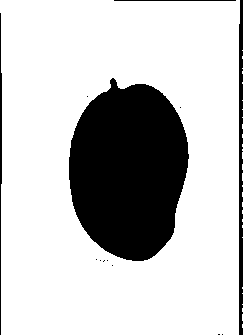

120b.jpg


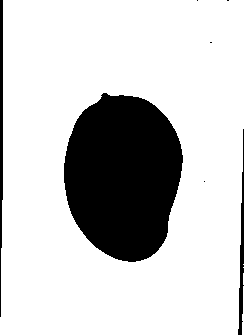

62a.jpg


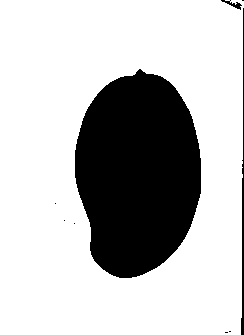

In [ ]:
# Ruta al directorio que contiene las imágenes
images_dir = 'images'

# Obtener la lista de nombres de archivos de imágenes
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Crear un directorio para almacenar las imágenes procesadas
output_dir = 'images_binarizadas'
os.makedirs(output_dir, exist_ok=True)

# Procesar todas las imágenes
processed_images = []
for filename in image_files:
    # Cargar la imagen
    image_path = os.path.join(images_dir, filename)
    img = cv2.imread(image_path)

    # Convertir a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar filtro de mediana para reducir el ruido
    blurred = cv2.medianBlur(gray, 5)

    # Aplicar umbralización adaptativa
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Encontrar contornos en la imagen umbralizada
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear una imagen de fondo blanco del mismo tamaño que la imagen original
    mask = np.ones_like(gray) * 255

    # Rellenar los contornos con negro en la máscara
    cv2.drawContours(mask, contours, -1, 0, thickness=cv2.FILLED)

    # Guardar la imagen procesada
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, mask)

    processed_images.append((filename, mask))

# Elegir tres imágenes aleatorias para mostrar
random_images = random.sample(processed_images, 3)

# Mostrar las tres imágenes aleatorias
for filename, processed_image in random_images:
    # Imprimir el nombre de la imagen arriba de la imagen
    print(filename)
    cv2_imshow(processed_image)


In [ ]:
# Directorio donde se encuentran las imágenes
directory = 'images_binarizadas'

# Lista para almacenar los resultados
results = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(directory):
    # Ruta completa de la imagen
    filepath = os.path.join(directory, filename)

    # Leer la imagen
    image = cv2.imread(filepath)

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular los momentos de la imagen
    M = cv2.moments(gray)

    # Calcular las coordenadas del centroide
    centroid_x = int(M["m10"]/M["m00"])
    centroid_y = int(M["m01"]/M["m00"])

    # Calcular Hu Moments
    hu = cv2.HuMoments(M)

    # Almacenar los resultados en la lista
    results.append([filename] + [moment[0] for moment in hu])

# Convertir la lista a un DataFrame de pandas
df = pd.DataFrame(results, columns=['Image ID', 'Hu1', 'Hu2', 'Hu3', 'Hu4', 'Hu5', 'Hu6', 'Hu7'])

# Guardar el DataFrame en un archivo Excel
excel_file = 'hu_moments.xlsx'
df.to_excel(excel_file, index=False)

print("Los Hu Moments se han guardado en el archivo Excel:", excel_file)

Los Hu Moments se han guardado en el archivo Excel: hu_moments.xlsx


In [ ]:
# Rutas de los archivos
excel_path = 'hu_moments.xlsx'
csv_path = 'Harumanis_mango_weight.csv'

# Leer los archivos
hu_moments_df = pd.read_excel(excel_path)
mango_weight_df = pd.read_csv(csv_path)

# Fusionar los DataFrames en base al "Image ID" manteniendo todos los valores de hu_moments_df
merged_df = pd.merge(hu_moments_df, mango_weight_df, on='Image ID', how='left')

# Rellenar los valores faltantes en la columna "Weight" con valores vacíos
merged_df['Weight'].fillna('', inplace=True)

# Guardar el DataFrame fusionado en el archivo Excel
merged_df.to_excel(excel_path, index=False)

In [ ]:
# Carga el archivo Excel
archivo_excel = "hu_moments.xlsx"
datos = pd.read_excel(archivo_excel)

# Verifica si hay valores nulos en los datos
valores_nulos = datos.isnull().sum()

# Muestra los valores nulos
print("Valores nulos en el archivo Excel:")
print(valores_nulos)

Valores nulos en el archivo Excel:
Image ID    0
Hu1         0
Hu2         0
Hu3         0
Hu4         0
Hu5         0
Hu6         0
Hu7         0
Weight      6
dtype: int64


In [ ]:
print(datos.head().to_string(index=True))

   Image ID       Hu1           Hu2           Hu3           Hu4           Hu5           Hu6           Hu7  Weight
0  255a.jpg  0.001015  9.769419e-08  1.524661e-12  1.394215e-11  6.313069e-23  4.305742e-15  1.210512e-23    0.55
1  192a.jpg  0.001116  1.277048e-07  1.247646e-12  9.890583e-12  1.411719e-23  1.177204e-15  3.174654e-23    0.65
2   59b.jpg  0.001020  1.170955e-07  3.002162e-12  7.507119e-12 -2.344184e-23 -1.870263e-15  2.684451e-23    0.45
3  163b.jpg  0.000954  8.944837e-08  7.407381e-15  4.158501e-13  9.908853e-27  5.788025e-17  2.084480e-26    0.41
4  165a.jpg  0.000922  8.454149e-08  2.894272e-13  2.610955e-12  1.035060e-24  2.995139e-16  2.019950e-24    0.37


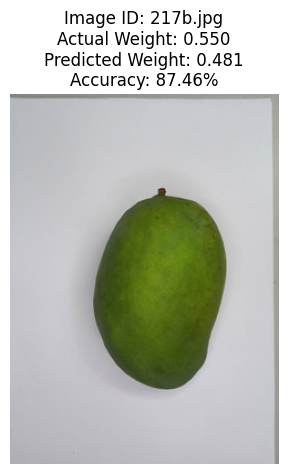

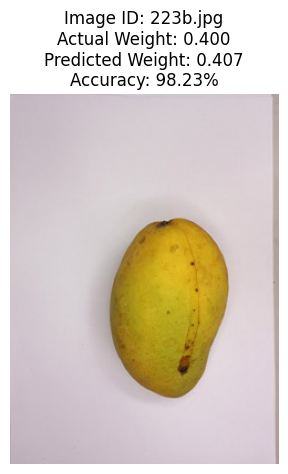

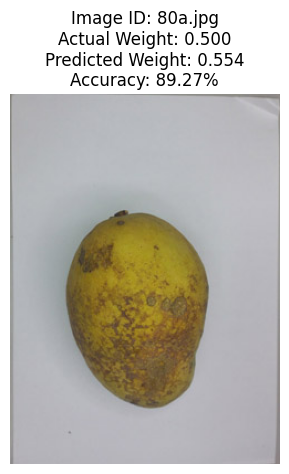

In [ ]:
# Cargar los datos desde el archivo Excel
data_path = 'hu_moments.xlsx'
df = pd.read_excel(data_path)

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Separar las características (X) y la variable objetivo (y)
X = df[['Hu1', 'Hu2', 'Hu3', 'Hu4', 'Hu5', 'Hu6', 'Hu7']]
y = df['Weight']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características de entrenamiento para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Guardar el modelo entrenado en un archivo
model_filename = 'linear_regression_model.pkl'
joblib.dump((model, scaler), model_filename)

# Seleccionar tres imágenes aleatorias de la carpeta de imágenes
images_path = 'images'
image_ids = df['Image ID'].tolist()
random_image_ids = random.sample(image_ids, 3)

for random_image_id in random_image_ids:
    # Encontrar la fila correspondiente al Image ID seleccionado
    selected_row = df[df['Image ID'] == random_image_id]

    # Extraer las características X para la imagen seleccionada
    X_selected = selected_row[['Hu1', 'Hu2', 'Hu3', 'Hu4', 'Hu5', 'Hu6', 'Hu7']]

    # Escalar las características de la imagen seleccionada utilizando el mismo scaler de entrenamiento
    X_selected_scaled = scaler.transform(X_selected)

    # Realizar la predicción del peso para la imagen seleccionada
    predicted_weight = model.predict(X_selected_scaled)[0]
    actual_weight = selected_row['Weight'].values[0]

    # Calcular la precisión en términos porcentuales
    accuracy = 100 * (1 - abs(actual_weight - predicted_weight) / actual_weight)

    # Redondear el valor predicho a tres decimales y completar con ceros
    predicted_weight_rounded = "{:.3f}".format(predicted_weight)

    # Redondear el valor real de peso a tres decimales y completar con ceros
    actual_weight_rounded = "{:.3f}".format(actual_weight)

    # Cargar y mostrar la imagen seleccionada
    image_filename = selected_row['Image ID'].values[0]  # Suponiendo que 'Image ID' es el nombre de la columna que contiene los nombres de archivo de las imágenes
    image_path = os.path.join(images_path, image_filename)
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(f"Image ID: {random_image_id}\nActual Weight: {actual_weight_rounded}\nPredicted Weight: {predicted_weight_rounded}\nAccuracy: {accuracy:.2f}%")
    plt.axis('off')
    plt.show()

In [ ]:
# Escalar las características de prueba utilizando el mismo scaler de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.0014021744451532064
R-squared (R²): 0.8235609432947405
